In [10]:
pip install tensorflow

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
3/3 [==============================] - 2s 12ms/step - loss: 0.3595
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3230
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2883
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2522
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2169
Epoch 6/50
3/3 [==============================] - 0s 10ms/step - loss: 0.1836
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1487
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1152
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0822
Epoch 10/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0526
Epoch 11/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0293
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0161


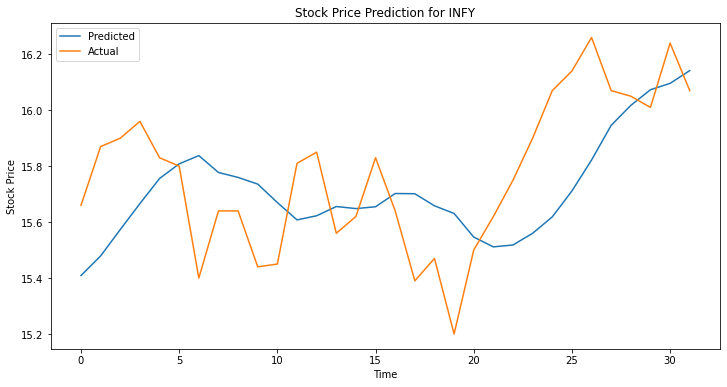

In [1]:
'''Take stock price of any company you
want and predicts its price by using LSTM.
Use only Jupyter notebook code.'''
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

stock_symbol = "INFY"
start_date = "2022-09-13"
end_date = "2023-07-13"
df = yf.download(stock_symbol, start=start_date, end=end_date)
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append((seq, target))
    return sequences

seq_length = 10
train_sequences = create_sequences(train_data, seq_length)
test_sequences = create_sequences(test_data, seq_length)

# Separate sequences and targets
X_train = np.array([item[0] for item in train_sequences])
y_train = np.array([item[1] for item in train_sequences])
X_test = np.array([item[0] for item in test_sequences])
y_test = np.array([item[1] for item in test_sequences])

# Convert NumPy arrays to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=64)
test_loss = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.title(f'Stock Price Prediction for {stock_symbol}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()